In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# mnist dataset import 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
X_train shape : (60000, 28, 28)
y_train shape : (60000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

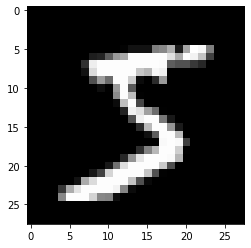

In [ ]:
plt.imshow(X_train[0], cmap='gray')

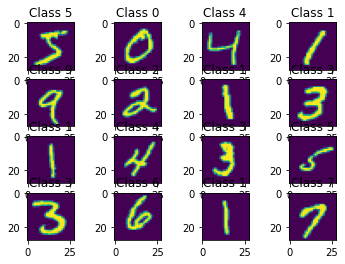

In [ ]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.title("Class {}".format(y_train[i]))

## X_train.reshape(60000, 784)
- X_train shape : (60000, 28, 28) 의 형상을
- X_train shape : (60000, 784) 의 형태로 flat 하게 만들어주자

- y_train shape : (60000,) 의 형상은 변경해줄 필요없다. 

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
Y_train = keras.utils.to_categorical(y_train)# one hot encoding
Y_test = keras.utils.to_categorical(y_test)

In [ ]:
Y_train.shape # label data로 확인

(60000, 10)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, Y_train, batch_size=32, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 1.5982 - accuracy: 0.9054
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2043 - accuracy: 0.9487
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1805 - accuracy: 0.9536
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1717 - accuracy: 0.9567
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1409 - accuracy: 0.9633
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1317 - accuracy: 0.9668
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1149 - accuracy: 0.9715
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1055 - accuracy: 0.9750
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0913 - accuracy: 0.9778
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.085

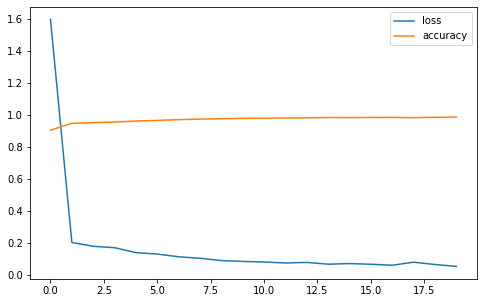

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
np.round(model.predict(X_test))[0]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
score = model.evaluate(X_test, Y_test,
                       verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.17238613963127136
Test accuracy: 0.970300018787384


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread("./7.png", cv2.IMREAD_GRAYSCALE) #RGB -> gray

In [ ]:
test_img.shape

(28, 28)

In [ ]:
test_img = test_img.reshape(1,784)# model 학습시에 input_shape을 지정 -> 1개 data에 대한 shape -> 실제 학습시 -> (32, 784) -> test시에도 (1, 784)로 변경하여  data를 입력해야 한다. 

In [ ]:
np.argmax(model.predict(test_img))

1/1 [==============================] - 0s 14ms/step


7